# Data Cookbook: Key Data Science Recipes

Maryanne Ndung'u

Welcome  to  my Data Science Cookbook! I've compiled this collection of essential recipes that I have learnt this semester.

For the sake of My cookbook, I chose toe use the Iris dataset from seaborn, which is a standard dataset for learning data science techniques. 

## Recipe 1: Basic Dataframe Operations with Pandas

In [69]:
import pandas as pd
import seaborn as sns

# Load dataset
iris = sns.load_dataset('iris')

# Display the first 5 rows of the dataframe
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
# Display basic information about dataframe
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [71]:
# Display basic statistics about dataframe
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [72]:
# Sort dataframe by 'sepal_length' and find the maximum and minimum values
max_sepal_length = iris.sort_values(by='sepal_length', ascending=False).iloc[0]
min_sepal_length = iris.sort_values(by='sepal_length', ascending=True).iloc[0]

print("\nMaximum Sepal Length:\n", max_sepal_length)
print("\nMinimum Sepal Length:\n", min_sepal_length)



Maximum Sepal Length:
 sepal_length          7.9
sepal_width           3.8
petal_length          6.4
petal_width           2.0
species         virginica
Name: 131, dtype: object

Minimum Sepal Length:
 sepal_length       4.3
sepal_width        3.0
petal_length       1.1
petal_width        0.1
species         setosa
Name: 13, dtype: object


In [73]:
# Adding a new column: Sepal Area
iris['sepal_area'] = iris['sepal_length'] * iris['sepal_width']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00


This recipe demonstrates dataframe operations including data loading, viewing basic information and statistics, sorting, and adding a new column for further analysis

## Recipe 2: Data Cleaning - Handling Missing Values

In [74]:
# Checking for missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
sepal_area      0
dtype: int64

In [75]:
# Introduce missing values for demonstration Since dataset has none
iris.loc[0:10, 'sepal_width'] = None

# Fill missing values with the mean of the column
iris['sepal_width'].fillna(iris['sepal_width'].mean(), inplace=True)

iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.034532,1.4,0.2,setosa,17.85
1,4.9,3.034532,1.4,0.2,setosa,14.70
2,4.7,3.034532,1.3,0.2,setosa,15.04
3,4.6,3.034532,1.5,0.2,setosa,14.26
4,5.0,3.034532,1.4,0.2,setosa,18.00


This recipe demonstrates how to handle missing values in a dataset. I introduce missing values artificially and then fill them using the mean of the column.

## Recipe 3: Data Visualization with Matplotlib

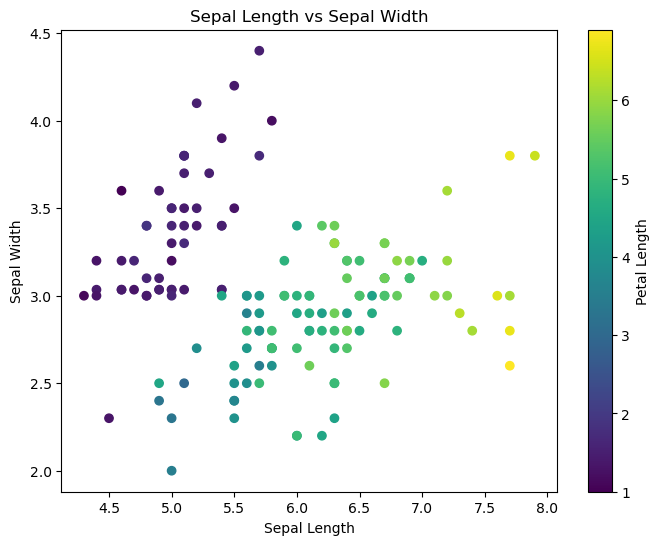

In [76]:
import matplotlib.pyplot as plt

# Plotting Sepal Length vs. Sepal Width
plt.figure(figsize=(8, 6))
plt.scatter(iris['sepal_length'], iris['sepal_width'], c=iris['petal_length'], cmap='viridis')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Petal Length')
plt.show()


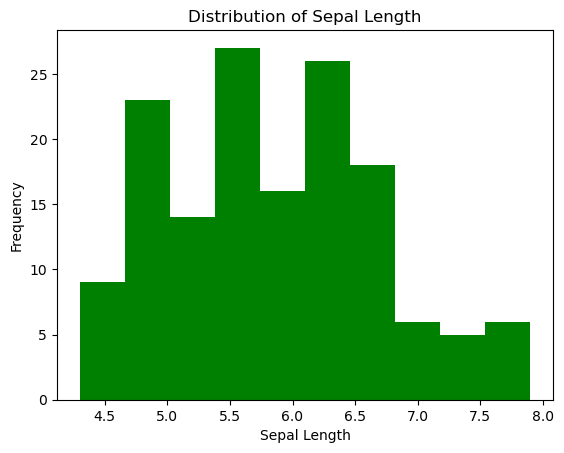

In [77]:
# Histogram of Sepal Length
plt.hist(iris['sepal_length'], bins=10, color='green')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()


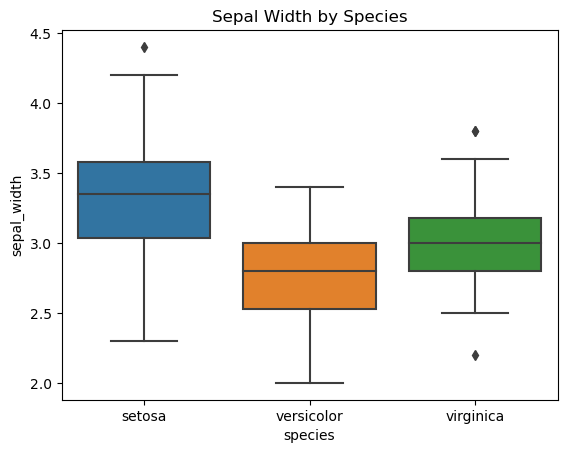

In [78]:
# Boxplot for comparing Sepal Width across Species
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title('Sepal Width by Species')
plt.show()

This recipe uses Matplotlib to create visualizations including scatter plot, histograms and boxplots, to analyze distributions and compare data across categories.

## Recipe 4: Data Aggregation with Pandas GroupBy

In [79]:
# Group by species and calculate mean values
grouped_data = iris.groupby('species').mean()

grouped_data

,sepal_length,sepal_width,petal_length,petal_width,sepal_area
species,,,,,
setosa,5.006,3.359597,1.462,0.246,17.2578
versicolor,5.936,2.770000,4.260,1.326,16.5262
virginica,6.588,2.974000,5.552,2.026,19.6846


This recipe demonstrates the use of pandas' groupby function to aggregate data. I group the Iris dataset by species and calculate mean values for each group.

## Recipe 5: Data Filtering

In [80]:
# Filter data where petal length is greater than the average
average_petal_length = iris['petal_length'].mean()
filtered_data = iris[iris['petal_length'] > average_petal_length]

filtered_data.head()


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
50,7.0,3.2,4.7,1.4,versicolor,22.40
51,6.4,3.2,4.5,1.5,versicolor,20.48
52,6.9,3.1,4.9,1.5,versicolor,21.39
53,5.5,2.3,4.0,1.3,versicolor,12.65
54,6.5,2.8,4.6,1.5,versicolor,18.20


This recipe shows how to filter a dataset based on a condition. We calculate the average petal length and then filter rows where petal length is greater than this average.

## Recipe 6: Data Visualization with Seaborn

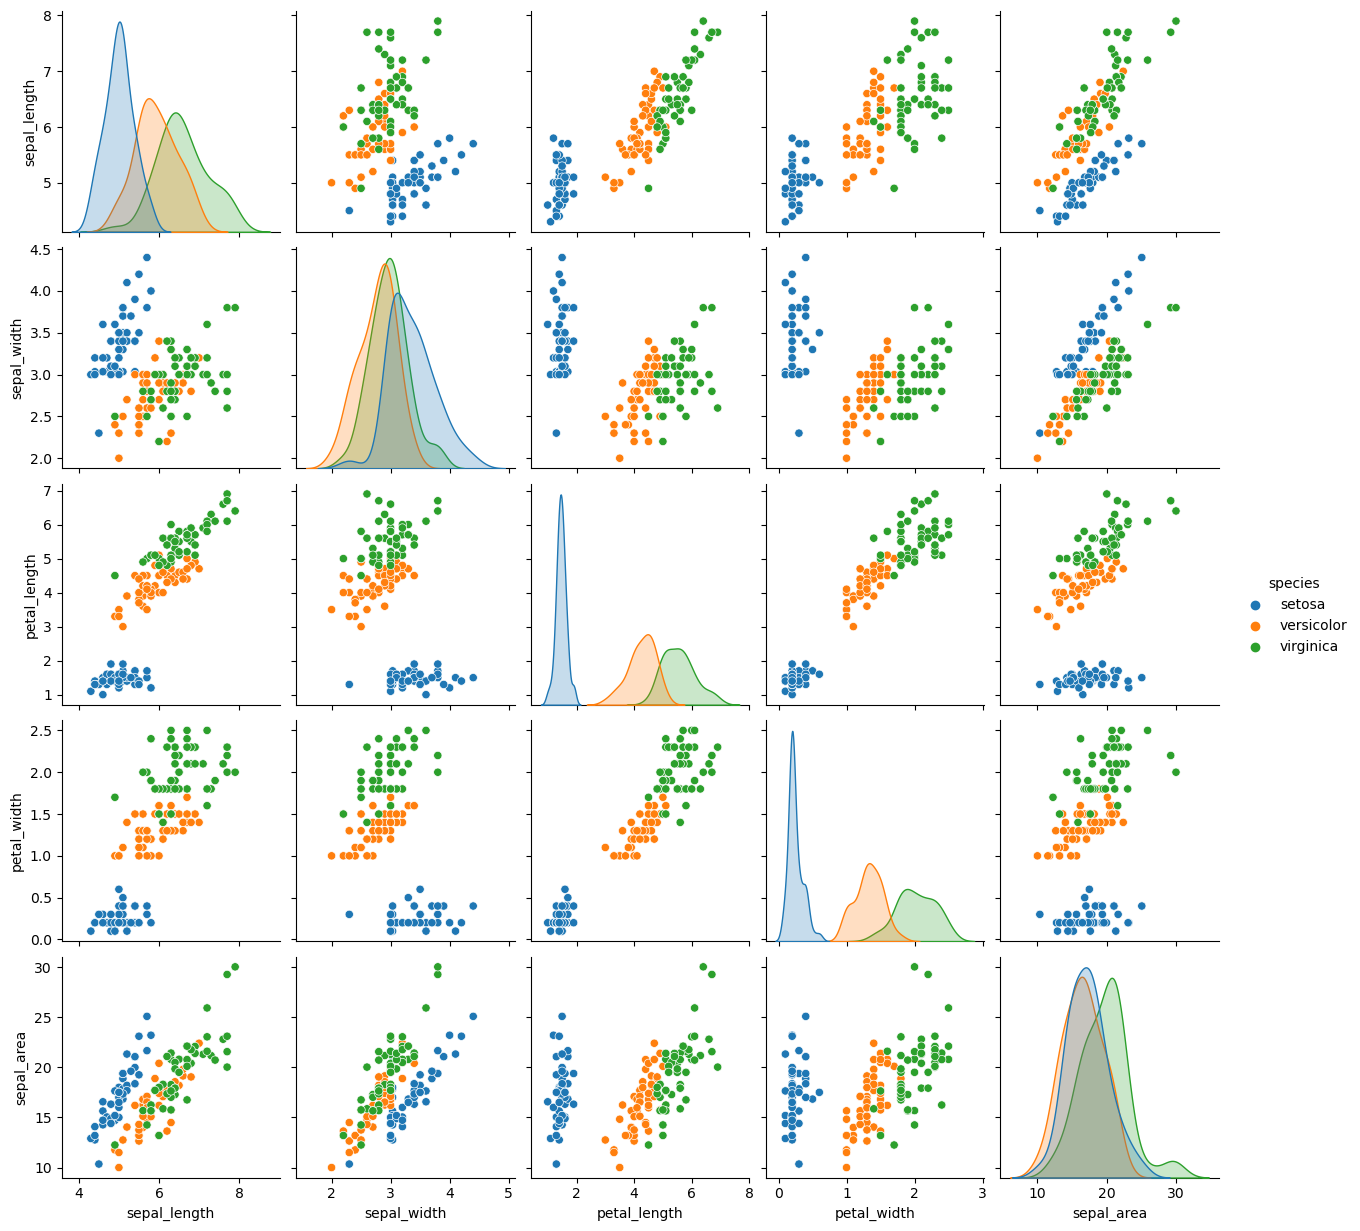

In [68]:
# Using Seaborn for advanced data visualization - pairplot

sns.pairplot(iris, hue='species')
plt.show()


This recipe uses seaborn to create a pairplot, which is useful for exploring relationships and distributions of data across multiple dimensions, colored by species.